In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections
import numpy as np

In [2]:
df = pd.read_csv('results/sim_trace.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 15 columns):
id                2004 non-null int64
type              2004 non-null object
app               2004 non-null int64
module            2004 non-null object
message           2004 non-null object
DES.src           2004 non-null int64
DES.dst           2004 non-null int64
TOPO.src          2004 non-null int64
TOPO.dst          2004 non-null int64
module.src        2004 non-null object
service           2004 non-null float64
time_in           2004 non-null float64
time_out          2004 non-null float64
time_emit         2004 non-null float64
time_reception    2004 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 235.0+ KB


In [4]:
df["time_latency"] = df["time_reception"] - df["time_emit"]
df["time_wait"] = df["time_in"] - df["time_reception"]  
df["time_service"] = df["time_out"] - df["time_in"]
df["time_response"] = df["time_out"] - df["time_reception"]
df["time_total_response"] = df["time_response"] + df["time_latency"]

In [5]:
# convert index to date type in order to use resample and agreegate functions of pandas
df["date"]=df.time_in.astype('datetime64[s]')
df.index = df.date

In [6]:
df.head()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,...,time_in,time_out,time_emit,time_reception,time_latency,time_wait,time_service,time_response,time_total_response,date
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:03:36,9,COMP_M,5,5_19,M.USER.APP.5,8,33,187,153,None,...,216.696023,219.341988,100.000000,216.696023,116.696023,0.0,2.645965,2.645965,119.341988,1970-01-01 00:03:36
1970-01-01 00:03:39,9,COMP_M,5,5_24,5_(19-24),33,38,153,153,5_19,...,219.341988,221.429996,219.341988,219.341988,0.000000,0.0,2.088009,2.088009,2.088009,1970-01-01 00:03:39
1970-01-01 00:03:39,9,COMP_M,5,5_25,5_(19-25),33,39,153,153,5_19,...,219.341988,222.668620,219.341988,219.341988,0.000000,0.0,3.326633,3.326633,3.326633,1970-01-01 00:03:39
1970-01-01 00:03:39,9,COMP_M,5,5_20,5_(19-20),33,34,153,153,5_19,...,219.341988,225.323286,219.341988,219.341988,0.000000,0.0,5.981298,5.981298,5.981298,1970-01-01 00:03:39
1970-01-01 00:03:39,9,COMP_M,5,5_22,5_(19-22),33,36,153,153,5_19,...,219.341988,223.012955,219.341988,219.341988,0.000000,0.0,3.670967,3.670967,3.670967,1970-01-01 00:03:39


In [7]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [8]:
df_resample.shape

(198, 1)

In [9]:
timeLatency = df_resample.time_latency.values

In [10]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

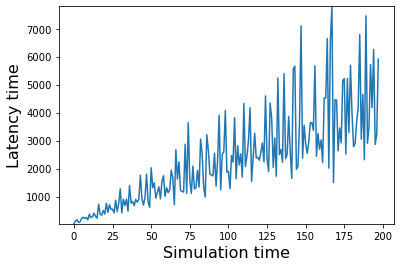

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

# Hop Count

In [19]:
# Hop count
cache_distance = {}

In [20]:
G = nx.read_graphml('results/graph_binomial_tree_5')

In [21]:
print(G.nodes())

['0', '32', '65', '2', '35', '4', '6', '103', '109', '14', '15', '20', '110', '100', '1', '96', '3', '102', '41', '11', '80', '50', '51', '52', '111', '75', '5', '39', '72', '73', '107', '47', '83', '87', '90', '92', '63', '7', '104', '76', '44', '112', '48', '29', '94', '97', '67', '70', '8', '16', '82', '86', '88', '60', '61', '101', '12', '13', '25', '26', '28', '30', '34', '55', '89', '91', '93', '95', '108', '17', '21', '38', '40', '45', '46', '53', '57', '79', '85', '98', '99', '9', '18', '19', '22', '23', '42', '54', '64', '66', '74', '81', '84', '105', '10', '24', '27', '31', '33', '36', '37', '43', '49', '56', '58', '59', '62', '68', '69', '71', '77', '78', '106', '184', '192', '189', '188', '186', '158', '178', '172', '145', '130', '183', '142', '153', '113', '154', '149', '138', '165', '119', '136', '190', '143', '170', '180', '177', '167', '156', '148', '126', '157', '150', '179', '187', '123', '155', '132', '191', '163', '176', '147', '135', '171', '114', '164', '121', '12

In [22]:
def compute_distance(k):
    return nx.shortest_path_length(G,str(k[0]),str(k[1]))

In [23]:
for row in df[["TOPO.src","TOPO.dst"]].iterrows():
    k = (row[1][0],row[1][1])
    if not k in cache_distance.keys():
        cache_distance[k] = compute_distance(k)

In [24]:
x = cache_distance.values() 
counter = collections.Counter(x)
print(counter)

Counter({4: 4, 6: 4, 0: 1, 5: 1, 7: 1})


In [25]:
data_a = {}
for k in range(10):
    data_a[k] = counter[k]

In [26]:
data_a

{0: 1, 1: 0, 2: 0, 3: 0, 4: 4, 5: 1, 6: 4, 7: 1, 8: 0, 9: 0}

In [27]:
data_a = data_a.values()

In [28]:
ticks = range(10)

In [29]:
N = len(ticks)
ind = np.array(ticks)
width = 0.45

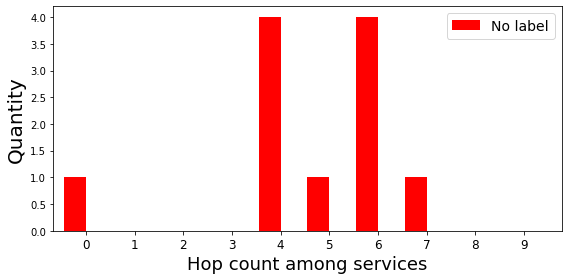

In [30]:
fig, ax = plt.subplots(figsize=(8.0,4.0))
ax.get_xaxis().set_ticks(range(0, len(ticks) * 2, 2))
r = ax.bar(ind, data_a, width, color='r')
ax.set_xticks(ind+ width/2)
ax.set_xticklabels(ticks, fontsize=12)
#ax.set_title("App")
ax.set_xlim(-width, len(ticks))
ax.plot([], c='#a6bddb', label="No LABEL",linewidth=3)
ax.set_xlabel("Hop count among services", fontsize=18)
ax.set_ylabel("Quantity", fontsize=20)
plt.legend([r],['No label'],loc="upper right",fontsize=14)
plt.tight_layout()